# Bayes Decision Theory

Bayes decision theory is applied in Pattern Classification. It's based purely on probabilities. In an ideal scenario we know the statistical behaviours of each category is completely known to us, but that rarely happens in real life. It's goal is to minimize the error of classification based on probabilities. The fundamental assumption is that the problem has purely probabilistic character and all the Probabilities are known.

- A priori probability $P(\omega_{i})$: Expresses our prior knowledge for the probability of each class $\omega_{i}$ before an observation(i.e. In a contest 70% of participants were female and 30% male).
- Let $x$ be a feature of every class. The probability density $P(x|\omega_{i})$ of $x$ for each class $\omega_{i}$ expresses the distribution of $x$ on the events of each class $\omega_{i}$(i.e. The distribution of scores for female participants of the contest).
- Posterior probability $P(\omega_{i}|x)$: Expresses our posterior knowledge for the probability of $\omega_{i}$ 
given an obervation $x$(eg. Given a score of a participant what is the probability of this participant to be male).

What we are trying to achieve is when given an obervation $x$ decide in which class it most probabably belongs.  That is achieved with decision boundaries. In Bayes Theory the decision boundary is made in order to minimize the error of classification. The equation for the decision boundary of 2 classes with N variables $x_{i}$ is given by:

$$P(\omega_{1})p(\vec x |\omega_{1})=P(\omega_{2})p(\vec x |\omega_{2})$$

Given a random $\vec x$ we classify it in the class with the biggest Posterior Probability. In more quantitative terms if we had 2 classes and:
- $P(\omega_{1}|\vec x)>P(\omega_{2}|\vec x)\iff P(\omega_{1})P(\vec x|\omega_{1})>P(\omega_{2})P(\vec x|\omega_{2}) \iff \vec x\in\omega_{1} $
- $P(\omega_{2}|\vec x)>P(\omega_{1}|\vec x)\iff P(\omega_{2})P(\vec x|\omega_{2})>P(\omega_{1})P(\vec x|\omega_{1}) \iff \vec x\in\omega_{2}$

Bellow you can see the decision boundary between 2 classes as distributions $X_{1}\sim(0,1)$ and  $X_{2}\sim(4,1)$. I won't do the maths part of it but the error in this case is minimized when we put the decision boundary in $x=2$. If a given $x>2$ then $P(\omega_{2}|x)>P(\omega_{1}|x)$ therefore we will classify it in class 2. The error of classification for this problem is: $$P_{error}=P(\omega_{2})\int_{-\infty}^{2}P(x|\omega_{2})dx +P(\omega_{1})\int_{2}^{\infty}P(x|\omega_{1})dx$$


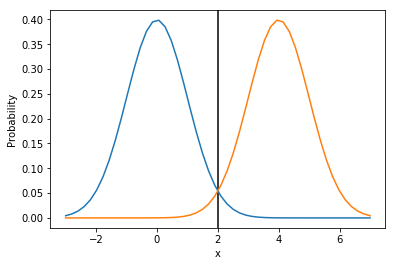

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture

mean = 0
mean1 = 4
sigma = 1
x = np.linspace(-3, 7)

plt.axvline(x=2, c='black')
plt.plot(x,norm.pdf(x, mean, sigma))
plt.plot(x,norm.pdf(x, mean1, sigma))
plt.xlabel('x')
plt.ylabel('Probability')
plt.show()

Let's see a more complex problem now. 

Suppose we have two classes $\omega_{1},\omega_{2}$ with $P(\omega_{1})=P(\omega_{2})$ and their probability density is given by:$$\frac{1}{2\pi\sigma_{i}^2}exp[-\frac{1}{2\sigma_{i}^2}(\vec x -\vec \mu_{i})^\intercal (\vec x -\vec \mu_{i})]$$

with $\mu_{1}=[1,1]^\intercal$,$\mu_{2}=[1.5,1.5]^\intercal$ and $\sigma_{1}^2=\sigma_{2}^2=0.2$

We are trying to make a classifier for these 2 classes that minimizes the error of classification.

First we can see that we have uncorelated variables since we can write it as:$$f_{x_{1} x_{2}}=f_{x_{1}}f_{x_{2}}$$

Thus the covariance matrix is(for both distributions):

$$\Sigma=
\begin{pmatrix}
0.2 & 0 \\
0 & 0.2
\end{pmatrix}
\quad$$

Here we have 2 normal 2-dimentional Gaussian distributions with equal covariance matrixes therefore the decision boundary will be a straight line. 

Lets plot them in 3d.

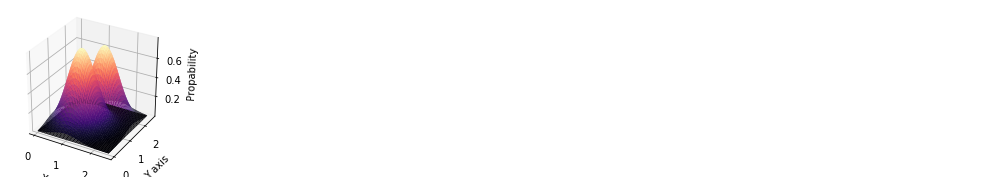

In [7]:
mu = np.array([1,1])
mu1 = np.array([1.5,1.5])
cov = np.array([[0.2,0],[0,0.2]])

x = np.linspace(0,2.5)
y = np.linspace(0,2.5)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal(mu, cov)
rv1 = multivariate_normal(mu1, cov)
fig = plt.figure(figsize=(3,3))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='magma',linewidth=0)
ax.plot_surface(X, Y, rv1.pdf(pos),cmap='magma',linewidth=0)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Propability')
plt.show()

We can do the calculations and find that the decision boundary is the line:$$y=2.5-x$$
As it is not clear in the 3d plot we will take the projections in the xy plane of the distributions and draw the decision boundary there.

<function matplotlib.pyplot.show(*args, **kw)>

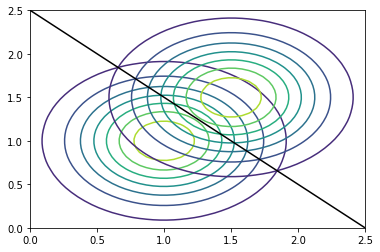

In [8]:
plt.contour(X, Y, rv.pdf(pos))
plt.contour(X,Y, rv1.pdf(pos))
y = 2.5 - x
plt.plot(x,y, c='black')
plt.show

The two distributions overlap alot, therefore a bayes classifier would have a high error of classification.

Lets do the same but this time the second distribution has $\mu_{2}=[3,3]^\intercal$

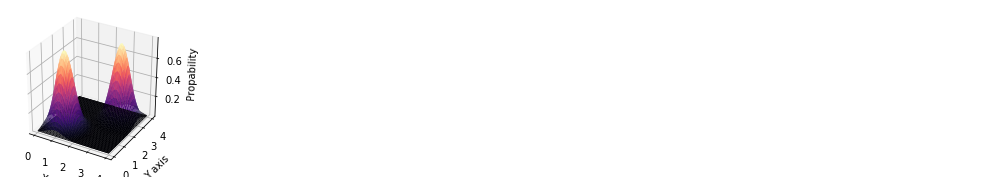

In [9]:
mu2 = np.array([3,3])

x = np.linspace(0,4)
y = np.linspace(0,4)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
Rv1 = multivariate_normal(mu2,cov)
fig = plt.figure(figsize=(3,3))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='magma',linewidth=0)
ax.plot_surface(X, Y, Rv1.pdf(pos),cmap='magma',linewidth=0)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Propability')
plt.show()

This time the decision boundary is the line $$y=4-x$$

<function matplotlib.pyplot.show(*args, **kw)>

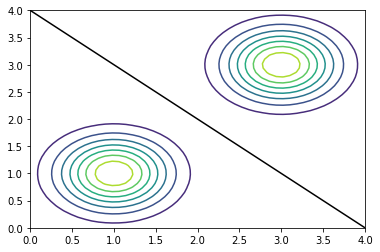

In [10]:
plt.contour(X, Y, rv.pdf(pos))
plt.contour(X,Y, Rv1.pdf(pos))
y = 4 - x
plt.plot(x,y, c='black')
plt.show

As expected the two of them do not overlap so much therefore a Bayes Classifier in this situation would have extremely low error of classification.

Now lets do a fun experiment with them. We will generate 100 random variables from both of these distributions,  try to classify them and find the classification error.

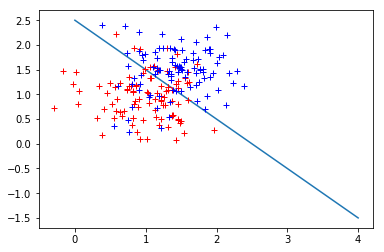

In [148]:
random_x,random_y= np.random.multivariate_normal(mu,cov,100).T
random_x1,random_y1= np.random.multivariate_normal(mu1,cov,100).T

y=2.5-x
plt.plot(x,y,random_x,random_y,'r+',random_x1,random_y1,'b+')
plt.show()

As you can see there are is a number of errors. An easy way to make the classification is by taking the sum of coordinates ($x+y$) and compare it with $2.5$. if $x+y<2.5$ then it belongs in class 1 and if $x+y>2.5$ it belongs in class 2. If by any chance $x+y=2.5$ we can't classify it. Since we know where our variables come from we can also use that to see if our classifier is wrong. 
Let's do the classification:

In [149]:
Class_A = random_x + random_y
Class=[]
for i in Class_A:
    if (i>2.5):
        Class.append(2)
    elif (i<2.5):
        Class.append(1)
    else:
        Class.append('None')

dict1={'x':random_x,'y':random_y, 'Class':Class}
Data_A=pd.DataFrame(dict1)
Data_A.groupby('Class').count()

,x,y
Class,,
1,80,80
2,20,20


In [151]:
Class_B = random_x1 + random_y1
Class=[]
for i in Class_B:
    if (i>2.5):
        Class.append(2)
    elif (i<2.5):
        Class.append(1)
    else:
        Class.append('None')

dict2={'x':random_x1,'y':random_y1, 'Class':Class}
Data_B=pd.DataFrame(dict2)
Data_B.groupby('Class').count()

,x,y
Class,,
1,20,20
2,80,80


We can see that 20 of the random variables from the first class were classified falsely and from the second 20 also. Note that the fact that they are equal is totally random and may vary alot depending on the randomly generated vectors. 
Since we are doing a random experiment we can use Monte Carlo simulation to compute the error of classification for each class. In order to do that we will repeat the experiment $10000$ times for the two classes seperately and count the errors made by our classifier in each repetition. Then we will take the mean of these errors and it will be near the value we would get if we used the analytical way. Note that we expect them to be equal. 
Let's see if its true:

In [152]:
Error_A=[]

for i in range(10000):
    count=0
    random_x,random_y= np.random.multivariate_normal(mu,cov,100).T
    class_1 = random_x + random_y
    for i in class_1:
        if (i>2.5):
            count+=1
        else:
            count=count
    Error_A.append(count)
    
print(np.mean(Error_A))


21.4667


In [153]:
Error_B=[]

for i in range(10000):
    count=0
    random_x,random_y= np.random.multivariate_normal(mu1,cov,100).T
    class_2 = random_x + random_y
    for i in class_2:
        if (i<2.5):
            count+=1
        else:
            count=count
    Error_B.append(count)
    
print(np.mean(Error_B))

21.3999


As expected the error of classification is almost equal for these 2 classes(approximately 21-22%).

Let's do the same for the class with $\mu_{2}=[3,3]^\intercal$

Here we expect a much smaller error of classification as the two Gaussian distributions dont overlap so much(note that it can't be 0 as Gaussian distributions expand from $-\infty$ to $\infty$).

This time we are going to use the scikit learn package in order to plot the decision boundary.

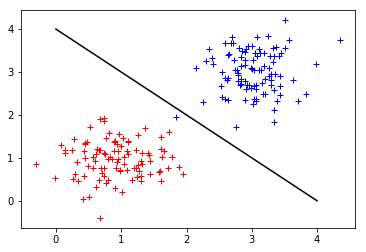

In [96]:
random_x,random_y= np.random.multivariate_normal(mu,cov,100).T
random_x2,random_y2= np.random.multivariate_normal(mu2,cov,100).T

y = 4 - x
plt.plot(x,y,random_x,random_y,'r+',random_x2,random_y2,'b+')
plt.show()


In [109]:
Class_A = random_x + random_y
Class=[]
for i in Class_A:
    if (i>4):
        Class.append(2)
    elif (i<4):
        Class.append(1)
    else:
        Class.append('None')

dict1a={'x':random_x,'y':random_y, 'Class':Class}
Data_Aa=pd.DataFrame(dict1a)
Data_Aa.groupby('Class').count()


,x,y
Class,,
1,100,100


All the random vectors generated are correctly classified.

In [110]:
Class_B_new = random_x2 + random_y2
Class=[]
for i in Class_B_new:
    if (i>4):
        Class.append(2)
    elif (i<4):
        Class.append(1)
    else:
        Class.append('None')

dict2n={'x':random_x2,'y':random_y2, 'Class':Class}
Data_Bn=pd.DataFrame(dict2n)
Data_Bn.groupby('Class').count()


,x,y
Class,,
1,1,1
2,99,99


Only 1 element from the second class was classified falsely.

Lets do the Monte Carlo simulation to find the error of classification and see the results. Again we expect them to be equal but this time very smaller than the previous example.


In [111]:
Error_A_new=[]

for i in range(10000):
    count=0
    random_x,random_y= np.random.multivariate_normal(mu,cov,100).T
    class_1 = random_x + random_y
    for i in class_1:
        if (i>4):
            count+=1
        else:
            count=count
    Error_A_new.append(count)
    
print(np.mean(Error_A_new))

0.0769


In [112]:
Error_B_new=[]

for i in range(10000):
    count=0
    random_x,random_y= np.random.multivariate_normal(mu2,cov,100).T
    class_2 = random_x + random_y
    for i in class_2:
        if (i<4):
            count+=1
        else:
            count=count
    Error_B_new.append(count)
    
print(np.mean(Error_B_new))

0.0755


As expected the error of classification is almost equal( approximately 0.07% for both classes) and very low(but not 0).

Lets do an example when we have a sample from 2d Gaussian distributions ($\omega_{1}$,$\omega_{2}$) with equal probabilities $P(\omega_{1})=P(\omega_{2})$  but we don't know the mean $\mu$ and the covariance matrix $\Sigma$.


| #  | $\omega_{1}$ | $\omega_{2}$ |
| -- | ------------ | ------------ |
| 1  | (0.70, 0.60) | (1.65, 1.78) |
| 2  | (0.26, 0.36) | (1.67, 1.66) |
| 3  | (0.43, 0.44) | (1.65, 1.98) |
| 4  | (0.74, 0.72) | (1.36, 1.69) |
| 5  | (0.31, 0.49) | (1.22, 1.56) |
| 6  | (0.24, 0.62) | (1.32, 1.63) |
| 7  | (0.00, 0.56) | (1.59, 1.56) |
| 8  | (0.44, 0.16) | (1.34, 1.95) |
| 9  | (0.43, 0.62) | (1.28, 1.78) |
| 10 | (0.89, 0.87) | (1.11, 1.53) |
| 11 | (0.51, 0.57) | (1.69, 1.45) |
| 12 | (0.42, 0.66) | (1.62, 1.34) |
| 13 | (0.29, 0.88) | (1.33, 1.85) |
| 14 | (0.51, 0.64) | (1.54, 1.30) |
| 15 | (0.46, 0.47) | (1.35, 1.45) |
| 16 | (0.00, 0.23) | (1.50, 1.13) |
| 17 | (0.86, 0.64) | (1.50, 1.48) |
| 18 | (0.57, 0.54) | (1.34, 1.39) |
| 19 | (0.78, 0.37) | (1.42, 1.75) |
| 20 | (0.47, 0.63) | (1.42, 1.68) |

Since we don't know $\mu$ and $\sigma$ we will estimate them with the Maximum Likelihood Parameter Estimation. It is easy to show that the mean and sigma estimators are given by:

$$\hat\mu_{MLP}=\frac{1}{N}\sum_{i=1}^{N}x_{i}$$
$$\hat \Sigma  = \frac{1}{N} \sum_{i=1}^N \mathbf{(x_{i} - \hat \mu) (x_{i} -\hat  \mu)}^\intercal$$


In [3]:
A=np.array([[0.70,0.60],[0.26,0.36],[0.43,0.44],[0.74,0.72],[0.31,0.49],[0.24,0.62],[0.00,0.56],[0.44,0.16],[0.43,0.62],[0.89,0.87],[0.51,0.57],[0.42,0.66],[0.29,0.88],[0.51,0.64],[0.46,0.47],[0.00,0.23],[0.86,0.64],[0.57,0.54],[0.78,0.37],[0.47,0.63]])
B=np.array([[1.65,1.78],[1.67,1.66],[1.65,1.98],[1.36,1.69],[1.22,1.56],[1.32,1.63],[1.59,1.56],[1.34,1.95],[1.28,1.78],[1.11,1.53],[1.69,1.45],[1.62,1.34],[1.33,1.85],[1.54,1.30],[1.35,1.45],[1.50,1.13],[1.50,1.48],[1.34,1.39],[1.42,1.75],[1.42,1.68]])

mu_A = np.sum(A, axis=0)/20
mu_B = np.sum(B, axis=0)/20
cov_A = np.matmul((A-mu_A).transpose(),A-mu_A)/20
cov_B = np.matmul((B-mu_B).transpose(),B-mu_B)/20


Therefore we get the results:

$\hat\mu_{1}=(0.4655, 0.5535)$

$\hat\Sigma_1=
\begin{pmatrix}
0.05833475 & 0.01515575 \\
0.01515575 & 0.03163275
\end{pmatrix}
\quad$

$\hat\mu_{2}=(1.445, 1.597)$

$\hat\Sigma_2=
\begin{pmatrix}
0.025995 & -0.003215\\
-0.003215 & 0.046281
\end{pmatrix}
\quad$



<function matplotlib.pyplot.show(*args, **kw)>

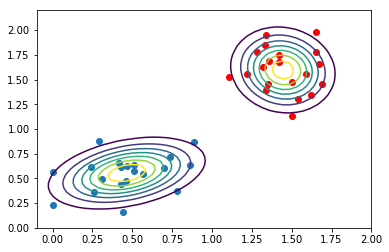

In [6]:
x = np.linspace(-0.1,2)
y = np.linspace(0,2.2)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv_A = multivariate_normal(mu_A, cov_A)
rv_B = multivariate_normal(mu_B, cov_B)
plt.contour(X, Y, rv_A.pdf(pos))
plt.contour(X,Y, rv_B.pdf(pos))
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c='red')
plt.show

Given the projections of the 2 Gaussians we can tell that the decision boundary is going to be a hyperbola.

In mathematical terms we should find the following:

$P(\omega_{1})p(\vec x |\omega_{1})=P(\omega_{2})p(\vec x |\omega_{2})\implies ln(P(\omega_{1}))+ln(p(\vec x |\omega_{1})=ln(P(\omega_{2}))+ln(p(\vec x |\omega_{2})$

$g_{i}(\vec x)=ln(P(\omega_{i}))+ln(p(\vec x |\omega_{i})$

Therefore the decision boundary will be: $$g_{1}(\vec x)-g_{2}(\vec x)=0$$
Which is a quadratic form that leads to a hyberbola, eclipse, or straight line. In this case it's a hyberbola.

Doing the math leads up to the following decision boundary:

$$9.567x^2-6.829y^2+11.74xy-55.986x-23.218y+62.431=0$$


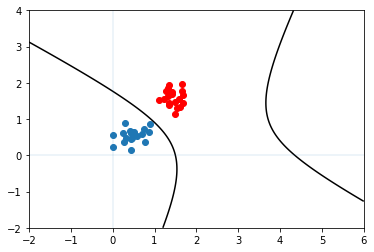

In [34]:
x = np.linspace(-2, 6, 400)
y = np.linspace(-2, 4, 400)
x, y = np.meshgrid(x, y)

def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)

a = .3
axes()

plt.contour(x, y, (9.567*x**2 - 6.829*y**2+11.74*x*y-55.986*x-23.218*y+62.431), [0], colors='k')
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c='red')

plt.show()


To classify our set this time we will compare  $9.567x^2-6.829y^2+11.74xy-55.986x-23.218y+62.431$ with 0.

In [4]:
cA = 9.567*A[:,0]**2 - 6.829*A[:,1]**2+11.74*A[:,0]*A[:,1]-55.986*A[:,0]-23.218*A[:,1]+62.431
cB = 9.567*B[:,0]**2 - 6.829*B[:,1]**2+11.74*B[:,0]*B[:,1]-55.986*B[:,0]-23.218*B[:,1]+62.431
ClassA=[]
for i in cA:
    if(i>0):
        ClassA.append(1)
    elif(i<0):
        ClassA.append(2)
    else:
        ClassA.append('none')

dic={'x':A[:,0],'y':A[:,1], 'Class':ClassA}
dic
dataA=pd.DataFrame(dic)
dataA.groupby('Class').count()
        

,x,y
Class,,
1,20,20


In [5]:
ClassB=[]
for i in cB:
    if(i>0):
        ClassB.append(1)
    elif(i<0):
        ClassB.append(2)
    else:
        ClassB.append('none')

dic_B={'x':B[:,0],'y':B[:,1], 'Class':ClassB}

dataB=pd.DataFrame(dic_B)
dataB.groupby('Class').count()

,x,y
Class,,
2,20,20


No errors were made in the classification.

We will use Monte Carlo Simulation to predict the error of classification of our classifier. 

In [9]:
error_A=[]

for i in range(100000):
    count=0
    random_x,random_y= np.random.multivariate_normal(mu_A,cov_A,100).T
    class_1 = 9.567*random_x**2 - 6.829*random_y**2+11.74*random_x*random_y-55.986*random_x-23.218*random_y+62.43
    for i in class_1:
        if (i<0):
            count+=1
        else:
            count=count
    error_A.append(count)
    
np.mean(error_A)

0.55582

In [10]:
error_B=[]

for i in range(100000):
    count=0
    random_x,random_y= np.random.multivariate_normal(mu_B,cov_B,100).T
    class_1 = 9.567*random_x**2 - 6.829*random_y**2+11.74*random_x*random_y-55.986*random_x-23.218*random_y+62.43
    for i in class_1:
        if (i>0):
            count+=1
        else:
            count=count
    error_B.append(count)
    
np.mean(error_B)

0.00039

Interestingly enough the error is different among the two classes. with the higher one being in the class number 1 although both are relatively small(<1%) making our classifier very successful.